<a href="https://colab.research.google.com/github/Ritikavarshney-hub/MNIST_by_numpy/blob/main/Mnist_Handwritten_digits_classifier_through_Numpy_(shallow_nn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MNIST_ORG.zip to MNIST_ORG.zip


Mounted at /content/drive
images shape: (60000, 28, 28)
labels shape: (60000,)
timages shape: (10000, 28, 28)
tlabels shape: (10000,)
Epoch 0/500 - Cost: 2.3022 - Accuracy: 17.04%
Epoch 1/500 - Cost: 2.2517 - Accuracy: 26.87%
Epoch 2/500 - Cost: 2.1978 - Accuracy: 37.27%
Epoch 3/500 - Cost: 2.1213 - Accuracy: 44.31%
Epoch 4/500 - Cost: 2.0231 - Accuracy: 49.43%
Epoch 5/500 - Cost: 1.9023 - Accuracy: 54.78%
Epoch 6/500 - Cost: 1.7625 - Accuracy: 58.92%
Epoch 7/500 - Cost: 1.6116 - Accuracy: 63.13%
Epoch 8/500 - Cost: 1.4594 - Accuracy: 67.34%
Epoch 9/500 - Cost: 1.3161 - Accuracy: 72.69%
Epoch 10/500 - Cost: 1.1909 - Accuracy: 71.25%
Epoch 11/500 - Cost: 1.0978 - Accuracy: 66.25%
Epoch 12/500 - Cost: 1.1169 - Accuracy: 42.20%
Epoch 13/500 - Cost: 1.6244 - Accuracy: 41.34%
Epoch 14/500 - Cost: 2.2861 - Accuracy: 48.94%
Epoch 15/500 - Cost: 1.4055 - Accuracy: 45.91%
Epoch 16/500 - Cost: 1.3455 - Accuracy: 66.04%
Epoch 17/500 - Cost: 1.0879 - Accuracy: 77.61%
Epoch 18/500 - Cost: 0.8510 - 

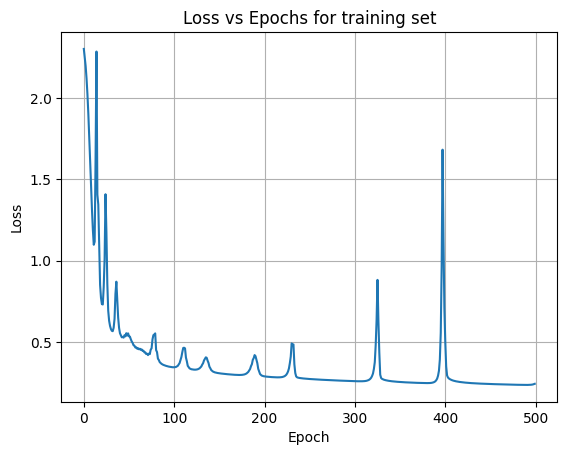

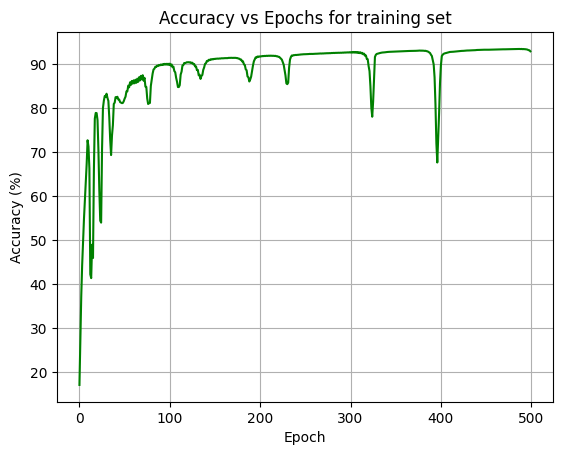


✅ Final Test Loss: 0.2471
✅ Final Test Accuracy: 92.95%


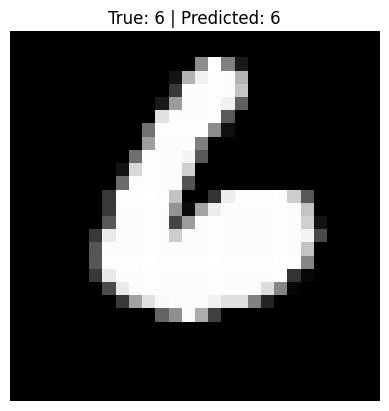

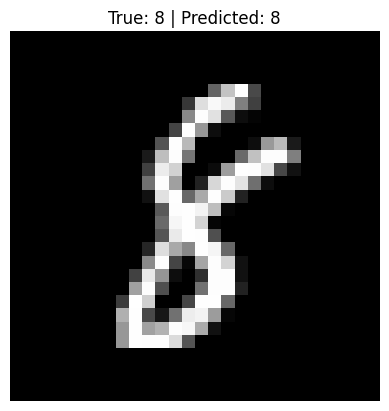

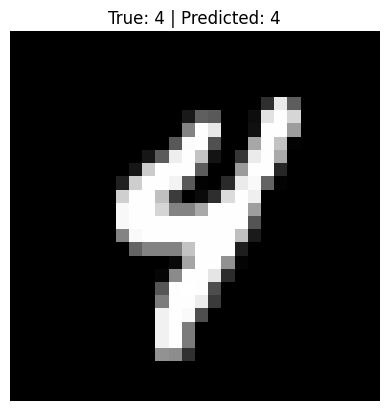

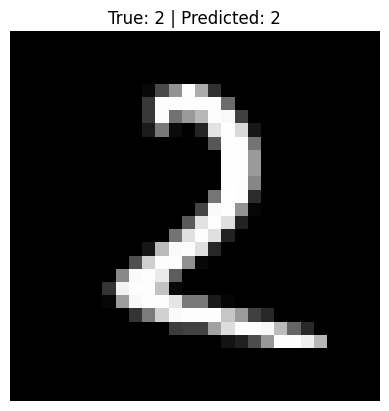

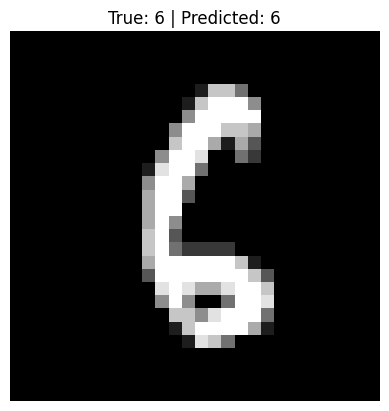

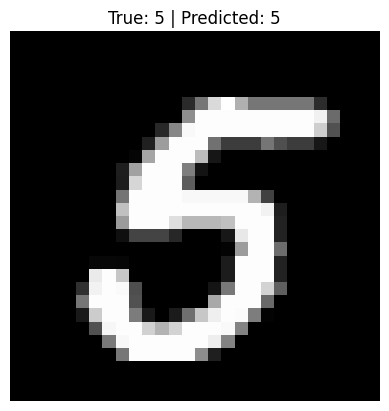

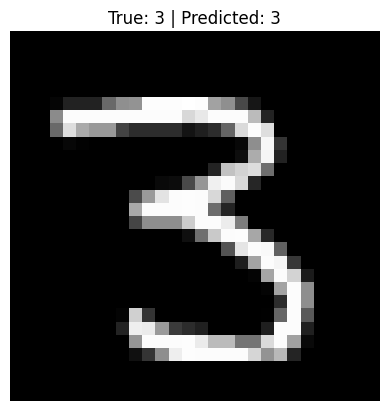

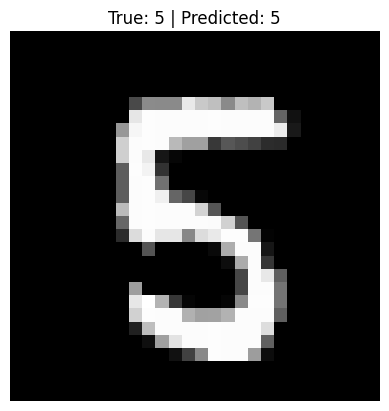

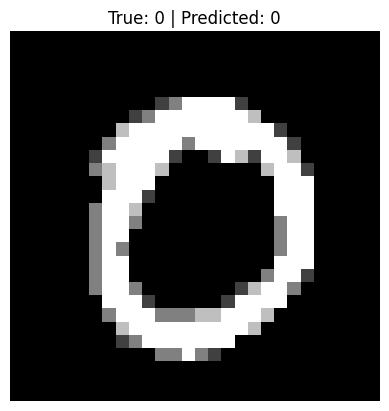

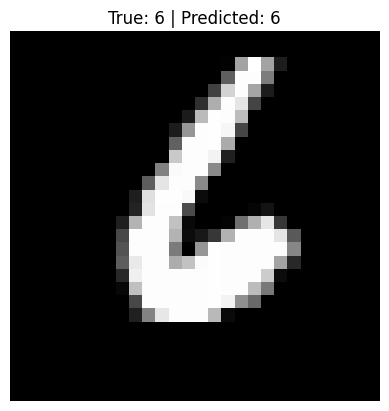

In [ ]:
# MNIST handwritten digits classifier through numpy of one hidden layer NN (used regularisation to prevent overfitting)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!pip install idx2numpy
!pip install matplotlib
!pip install numpy
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import zipfile
with zipfile.ZipFile("MNIST_ORG.zip",'r') as zip_ref:
  zip_ref.extractall("mnist_data")
import os
os.listdir("mnist_data")
images=idx2numpy.convert_from_file("mnist_data/train-images.idx3-ubyte")
labels=idx2numpy.convert_from_file('mnist_data/train-labels.idx1-ubyte')
timages=idx2numpy.convert_from_file('mnist_data/t10k-images.idx3-ubyte')
tlabels=idx2numpy.convert_from_file('mnist_data/t10k-labels.idx1-ubyte')
print("images shape:",images.shape)
print("labels shape:",labels.shape)
print("timages shape:",timages.shape)
print("tlabels shape:",tlabels.shape)
images=images/255.0
timages=timages/255.0
np.save('images.npy',images)
np.save('labels.npy',labels)
np.save('timages.npy',timages)
np.save('tlabels.npy',tlabels)
xtrain=np.load('images.npy')
ytrain=np.load('labels.npy')
xtest=np.load('timages.npy')
ytest=np.load('tlabels.npy')
xtrain = xtrain.reshape(xtrain.shape[0], -1).T
xtest = xtest.reshape(xtest.shape[0], -1).T
def onehot(y):
  yonehot=np.zeros((y.size,y.max()+1))
  yonehot[np.arange(y.size),y]=1
  yonehot=yonehot.T
  return yonehot
ytrain=onehot(ytrain)
ytest=onehot(ytest)
def layersize(nx,ny,nh):
  nx=xtrain.shape[0]
  ny=ytrain.shape[0]
  nh=10
  return nx,ny,nh
def initialiseparameters(nx,ny,nh):
  np.random.seed(1)
  W1=np.random.randn(nh,nx)*np.sqrt(2. / nx)
  b1=np.zeros((nh,1))
  W2=np.random.rand(ny,nh)*np.sqrt(2. / nh)
  b2=np.zeros((ny,1))
  return W1,b1,W2,b2
def relu(Z):
  return np.maximum(0,Z)
def relu_derivative(Z):
  return (Z > 0).astype(int)
def softmax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
def forwardprop(X,W1,b1,W2,b2):
  Z1=np.dot(W1,X)+b1
  A1=relu(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=softmax(Z2)
  return A1,A2
def computecost(A2, Y, W1, W2, lambd):
    m = Y.shape[1]
    cross_entropy_loss = -np.sum(Y * np.log(A2 + 1e-8)) / m
    L2_regularization_cost = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return cross_entropy_loss + L2_regularization_cost
def backprop(A1,A2,X,Y,W1,W2,lambd):
  m=Y.shape[1]
  dZ2=A2-Y
  dW2=(1/m)*np.dot(dZ2,A1.T) + (lambd / m) * W2
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*relu_derivative(A1)
  dW1=(1/m)*np.dot(dZ1,X.T)+(lambd / m) * W1
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
  return dW1,db1,dW2,db2
def updateparameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1=W1-alpha*dW1
  b1=b1-alpha*db1
  W2=W2-alpha*dW2
  b2=b2-alpha*db2
  return W1,b1,W2,b2
def accuracy(X, Y, W1, b1, W2, b2):
    A1, A2 = forwardprop(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    true_labels = np.argmax(Y, axis=0)
    acc = np.mean(predictions == true_labels) * 100
    return acc
def nnmodel(X, Y, nx, ny, nh, alpha, epochs,lambd):
  np.random.seed(3)
  nx=layersize(nx,ny,nh)[0]
  ny=layersize(nx,ny,nh)[1]
  nh=layersize(nx,ny,nh)[2]
  W1,b1,W2,b2=initialiseparameters(nx,ny,nh)
  costs=[]
  accuracies=[]
  for i in range(epochs):
    A1,A2=forwardprop(X,W1,b1,W2,b2)
    cost=computecost(A2,Y,W1,W2,lambd)
    dW1,db1,dW2,db2=backprop(A1,A2,X,Y,W1,W2,lambd)
    W1,b1,W2,b2=updateparameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    acc=accuracy(X,Y,W1,b1,W2,b2)
    accuracies.append(acc)
    costs.append(cost)
    print(f"Epoch {i}/{epochs} - Cost: {cost:.4f} - Accuracy: {acc:.2f}%")
  return W1,b1,W2,b2,costs,accuracies

nx=xtrain.shape[0]
ny=ytrain.shape[0]
nh=10

W1,b1,W2,b2,losses,accuracies=nnmodel(xtrain,ytrain,nx,ny,nh,alpha=0.6,epochs=500,lambd=0.1)
plt.plot(losses)
plt.title("Loss vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.plot(accuracies, color='green')
plt.title("Accuracy vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

_, A2_test = forwardprop(xtest, W1, b1, W2, b2)
test_loss = computecost(A2_test, ytest, W1, W2, lambd=0.1)
test_accuracy = accuracy(xtest, ytest, W1, b1, W2, b2)

print(f"\n Final Test Loss: {test_loss:.4f}")
print(f" Final Test Accuracy: {test_accuracy:.2f}%")


for i in range(10):
    index = np.random.randint(0, xtest.shape[1])
    x = xtest[:, index].reshape(-1, 1)
    y_true = np.argmax(ytest[:, index])
    _, A2 = forwardprop(x, W1, b1, W2, b2)
    prediction = np.argmax(A2)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true} | Predicted: {prediction}")
    plt.axis('off')
    plt.show()

Mounted at /content/drive
images shape: (60000, 28, 28)
labels shape: (60000,)
timages shape: (10000, 28, 28)
tlabels shape: (10000,)
Epoch 0/500 - Cost: 3.2511 - Accuracy: 42.05%
Epoch 1/500 - Cost: 3.2479 - Accuracy: 47.77%
Epoch 2/500 - Cost: 3.2444 - Accuracy: 50.45%
Epoch 3/500 - Cost: 3.2401 - Accuracy: 52.51%
Epoch 4/500 - Cost: 3.2340 - Accuracy: 53.03%
Epoch 5/500 - Cost: 3.2253 - Accuracy: 52.29%
Epoch 6/500 - Cost: 3.2127 - Accuracy: 50.60%
Epoch 7/500 - Cost: 3.1944 - Accuracy: 49.10%
Epoch 8/500 - Cost: 3.1682 - Accuracy: 48.62%
Epoch 9/500 - Cost: 3.1311 - Accuracy: 49.77%
Epoch 10/500 - Cost: 3.0800 - Accuracy: 52.61%
Epoch 11/500 - Cost: 3.0119 - Accuracy: 57.10%
Epoch 12/500 - Cost: 2.9246 - Accuracy: 61.62%
Epoch 13/500 - Cost: 2.8176 - Accuracy: 65.09%
Epoch 14/500 - Cost: 2.6923 - Accuracy: 67.31%
Epoch 15/500 - Cost: 2.5522 - Accuracy: 68.81%
Epoch 16/500 - Cost: 2.4033 - Accuracy: 69.90%
Epoch 17/500 - Cost: 2.2523 - Accuracy: 71.25%
Epoch 18/500 - Cost: 2.1060 - 

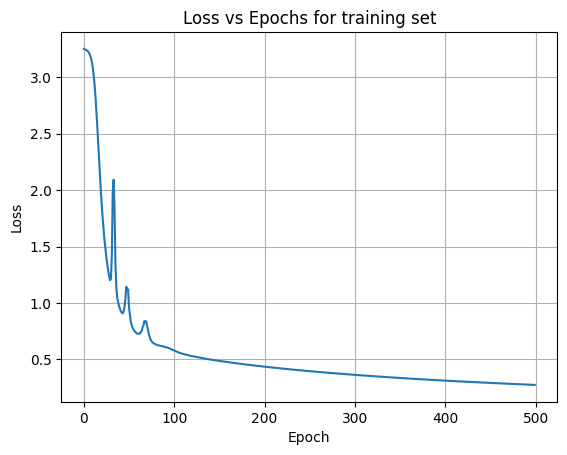

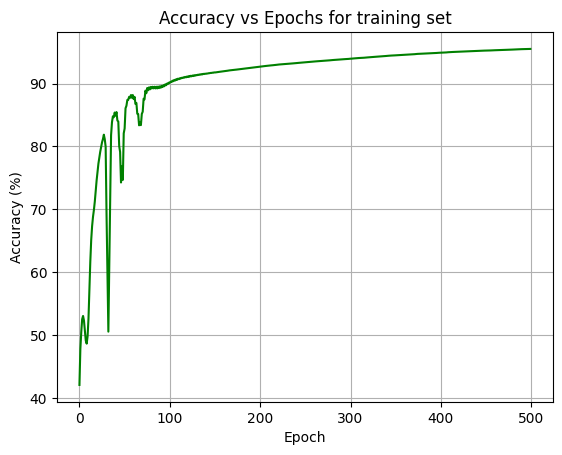


✅ Final Test Loss: 0.2779
✅ Final Test Accuracy: 95.30%


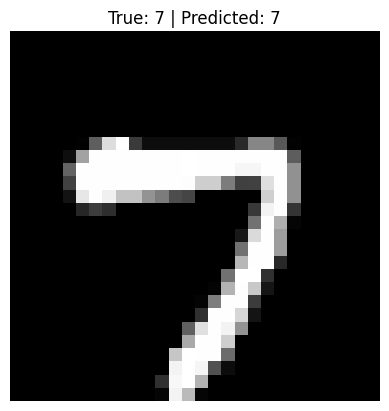

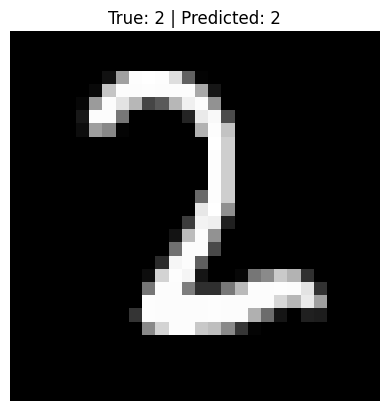

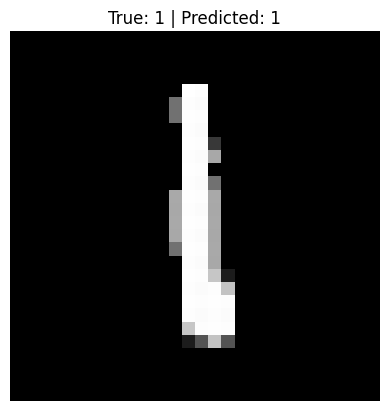

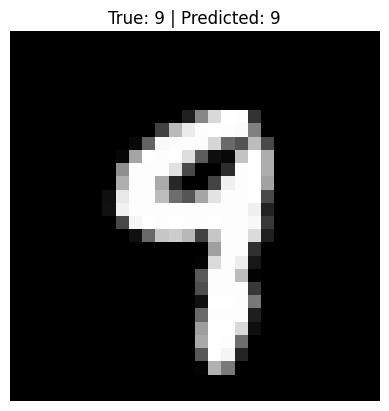

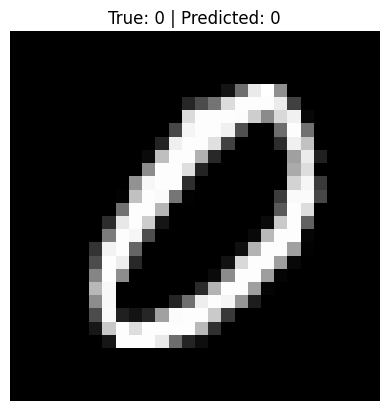

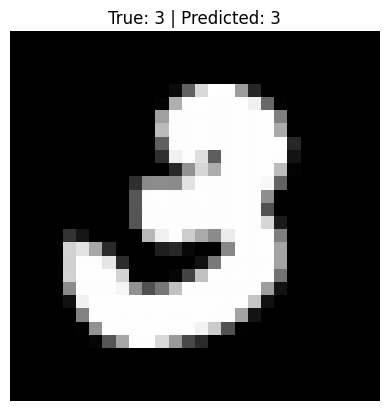

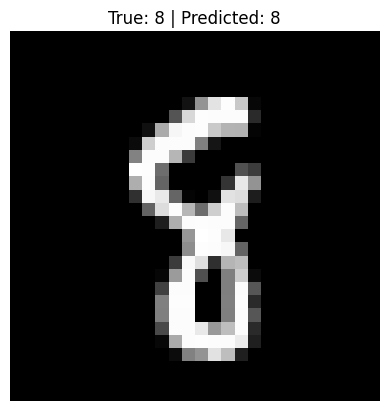

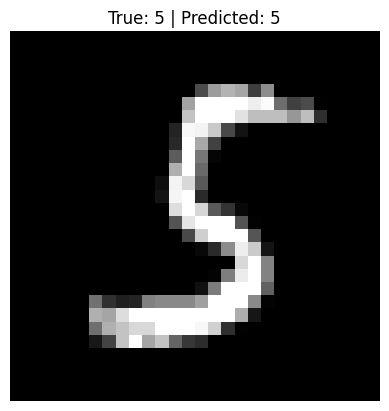

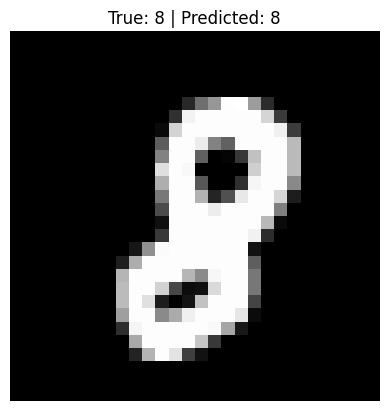

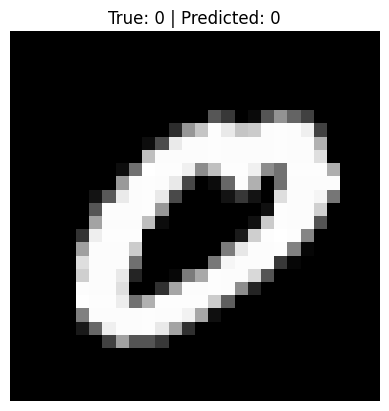

In [ ]:
#MNIST handwritten digit classifier through numpy of ONE hidden layer with no optimisation
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!pip install idx2numpy
!pip install matplotlib
!pip install numpy
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import zipfile
with zipfile.ZipFile("MNIST_ORG.zip",'r') as zip_ref:
  zip_ref.extractall("mnist_data")
import os
os.listdir("mnist_data")
images=idx2numpy.convert_from_file("mnist_data/train-images.idx3-ubyte")
labels=idx2numpy.convert_from_file('mnist_data/train-labels.idx1-ubyte')
timages=idx2numpy.convert_from_file('mnist_data/t10k-images.idx3-ubyte')
tlabels=idx2numpy.convert_from_file('mnist_data/t10k-labels.idx1-ubyte')
print("images shape:",images.shape)
print("labels shape:",labels.shape)
print("timages shape:",timages.shape)
print("tlabels shape:",tlabels.shape)
images=images/255.0
timages=timages/255.0
np.save('images.npy',images)
np.save('labels.npy',labels)
np.save('timages.npy',timages)
np.save('tlabels.npy',tlabels)
xtrain=np.load('images.npy')
ytrain=np.load('labels.npy')
xtest=np.load('timages.npy')
ytest=np.load('tlabels.npy')
xtrain = xtrain.reshape(xtrain.shape[0], -1).T
xtest = xtest.reshape(xtest.shape[0], -1).T
def onehot(y):
  yonehot=np.zeros((y.size,y.max()+1))
  yonehot[np.arange(y.size),y]=1
  yonehot=yonehot.T
  return yonehot
ytrain=onehot(ytrain)
ytest=onehot(ytest)
def layersize(nx,ny,nh):
  nx=xtrain.shape[0]
  ny=ytrain.shape[0]
  nh=128
  return nx,ny,nh
def initialiseparameters(nx,ny,nh):
  np.random.seed(1)
  W1=np.random.randn(nh,nx)*0.01
  b1=np.zeros((nh,1))
  W2=np.random.rand(ny,nh)*0.01
  b2=np.zeros((ny,1))
  return W1,b1,W2,b2
def relu(Z):
  return np.maximum(0,Z)
def relu_derivative(Z):
  return (Z > 0).astype(int)
def softmax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
def forwardprop(X,W1,b1,W2,b2):
  Z1=np.dot(W1,X)+b1
  A1=relu(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=softmax(Z2)
  return A1,A2
def computecost(A2, Y):
    m=Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)
    return cost
def backprop(A1,A2,X,Y,W2):
  m=Y.shape[1]
  dZ2=A2-Y
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*relu_derivative(A1)
  dW1=(1/m)*np.dot(dZ1,X.T)
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
  return dW1,db1,dW2,db2
def updateparameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1=W1-alpha*dW1
  b1=b1-alpha*db1
  W2=W2-alpha*dW2
  b2=b2-alpha*db2
  return W1,b1,W2,b2
def accuracy(X, Y, W1, b1, W2, b2):
    A1, A2 = forwardprop(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    true_labels = np.argmax(Y, axis=0)
    acc = np.mean(predictions == true_labels) * 100
    return acc
def nnmodel(X, Y, nx, ny, nh, alpha, epochs):
  np.random.seed(3)
  nx=layersize(nx,ny,nh)[0]
  ny=layersize(nx,ny,nh)[1]
  nh=layersize(nx,ny,nh)[2]
  W1,b1,W2,b2=initialiseparameters(nx,ny,nh)
  costs=[]
  accuracies=[]
  for i in range(epochs):
    A1,A2=forwardprop(X,W1,b1,W2,b2)
    cost=computecost(A2,Y)
    dW1,db1,dW2,db2=backprop(A1,A2,X,Y,W2)
    W1,b1,W2,b2=updateparameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    acc=accuracy(X,Y,W1,b1,W2,b2)
    accuracies.append(acc)
    costs.append(cost)
    print(f"Epoch {i}/{epochs} - Cost: {cost:.4f} - Accuracy: {acc:.2f}%")
  return W1,b1,W2,b2,costs,accuracies

nx=xtrain.shape[0]
ny=ytrain.shape[0]
nh=128

W1,b1,W2,b2,losses,accuracies=nnmodel(xtrain,ytrain,nx,ny,nh,alpha=0.5,epochs=500)
plt.plot(losses)
plt.title("Loss vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.plot(accuracies, color='green')
plt.title("Accuracy vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()



_, A2_test = forwardprop(xtest, W1, b1, W2, b2)
test_loss = computecost(A2_test, ytest)
test_accuracy = accuracy(xtest, ytest, W1, b1, W2, b2)

print(f"\n Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


for i in range(10):
    index = np.random.randint(0, xtest.shape[1])
    x = xtest[:, index].reshape(-1, 1)
    y_true = np.argmax(ytest[:, index])
    _, A2 = forwardprop(x, W1, b1, W2, b2)
    prediction = np.argmax(A2)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true} | Predicted: {prediction}")
    plt.axis('off')
    plt.show()










Mounted at /content/drive
images shape: (60000, 28, 28)
labels shape: (60000,)
timages shape: (10000, 28, 28)
tlabels shape: (10000,)
Epoch 0/500 - Cost: 2.3211 - Accuracy: 69.10%
Epoch 1/500 - Cost: 1.6011 - Accuracy: 68.01%
Epoch 2/500 - Cost: 1.3181 - Accuracy: 60.84%
Epoch 3/500 - Cost: 1.3426 - Accuracy: 66.69%
Epoch 4/500 - Cost: 1.4082 - Accuracy: 63.17%
Epoch 5/500 - Cost: 1.1005 - Accuracy: 64.38%
Epoch 6/500 - Cost: 1.1604 - Accuracy: 68.03%
Epoch 7/500 - Cost: 1.0678 - Accuracy: 71.77%
Epoch 8/500 - Cost: 0.9013 - Accuracy: 70.90%
Epoch 9/500 - Cost: 0.8803 - Accuracy: 73.01%
Epoch 10/500 - Cost: 0.8436 - Accuracy: 72.28%
Epoch 11/500 - Cost: 0.8245 - Accuracy: 76.66%
Epoch 12/500 - Cost: 0.7429 - Accuracy: 75.92%
Epoch 13/500 - Cost: 0.7250 - Accuracy: 79.55%
Epoch 14/500 - Cost: 0.6546 - Accuracy: 79.23%
Epoch 15/500 - Cost: 0.6513 - Accuracy: 80.86%
Epoch 16/500 - Cost: 0.6081 - Accuracy: 81.54%
Epoch 17/500 - Cost: 0.6072 - Accuracy: 81.67%
Epoch 18/500 - Cost: 0.5840 - 

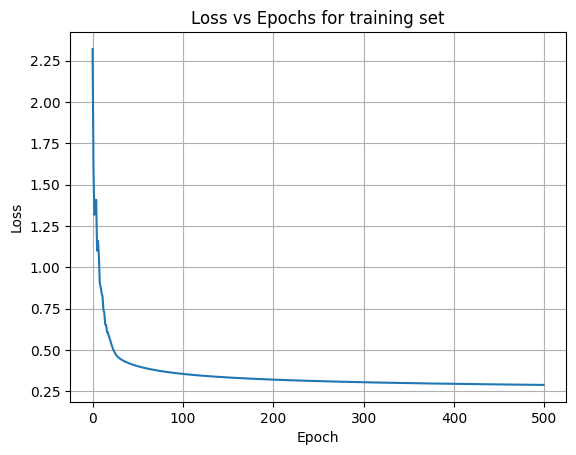

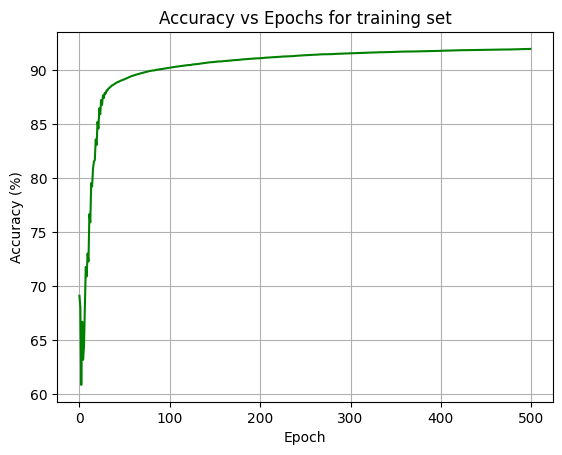


✅ Final Test Loss: 0.2835
✅ Final Test Accuracy: 92.05%


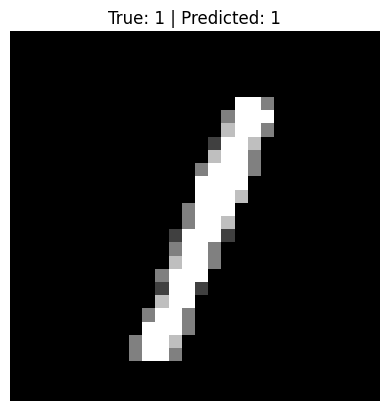

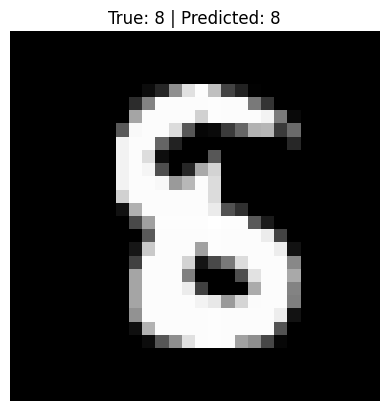

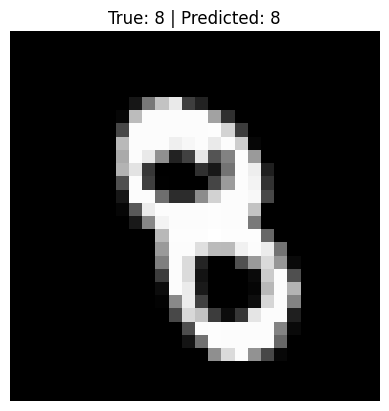

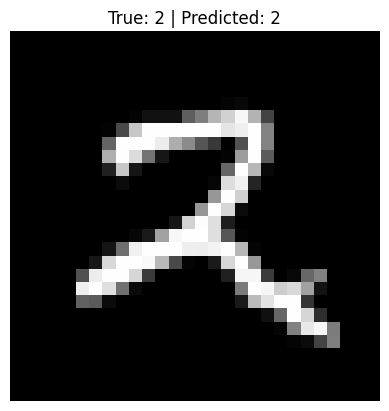

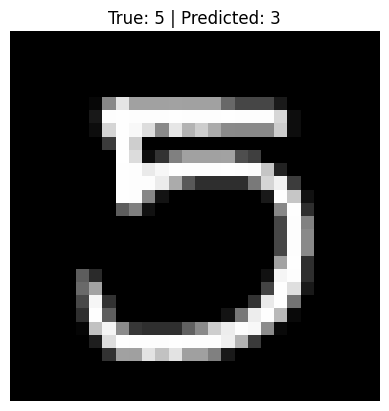

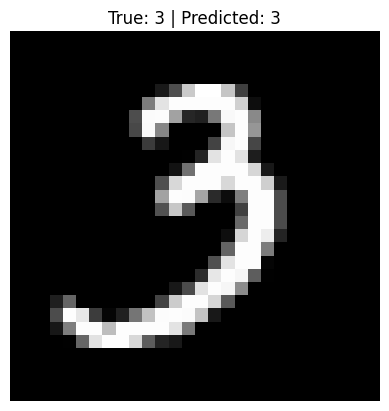

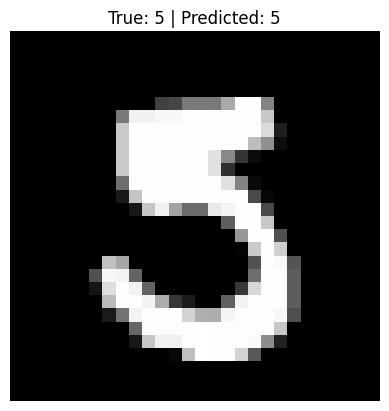

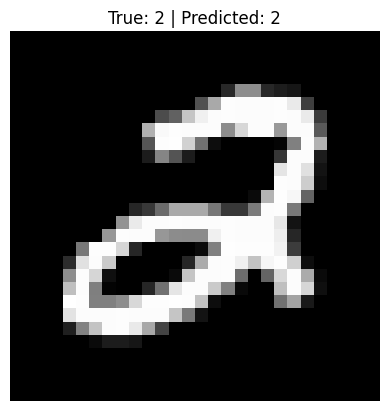

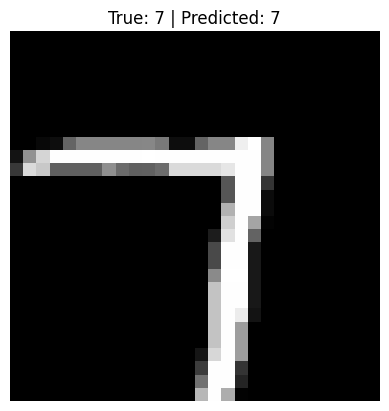

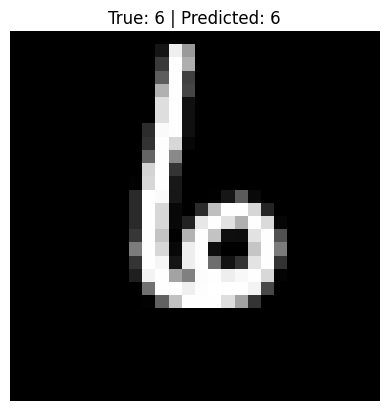

In [ ]:
#MNIST handwritten digit classifier through numpy wiht no hidden layer
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!pip install idx2numpy
!pip install matplotlib
!pip install numpy
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import zipfile
with zipfile.ZipFile("MNIST_ORG.zip",'r') as zip_ref:
  zip_ref.extractall("mnist_data")
import os
os.listdir("mnist_data")
images=idx2numpy.convert_from_file("mnist_data/train-images.idx3-ubyte")
labels=idx2numpy.convert_from_file('mnist_data/train-labels.idx1-ubyte')
timages=idx2numpy.convert_from_file('mnist_data/t10k-images.idx3-ubyte')
tlabels=idx2numpy.convert_from_file('mnist_data/t10k-labels.idx1-ubyte')
print("images shape:",images.shape)
print("labels shape:",labels.shape)
print("timages shape:",timages.shape)
print("tlabels shape:",tlabels.shape)
images=images/255.0
timages=timages/255.0
np.save('images.npy',images)
np.save('labels.npy',labels)
np.save('timages.npy',timages)
np.save('tlabels.npy',tlabels)
xtrain=np.load('images.npy')
ytrain=np.load('labels.npy')
xtest=np.load('timages.npy')
ytest=np.load('tlabels.npy')
xtrain = xtrain.reshape(xtrain.shape[0], -1).T
xtest = xtest.reshape(xtest.shape[0], -1).T
def onehot(y):
  yonehot=np.zeros((y.size,y.max()+1))
  yonehot[np.arange(y.size),y]=1
  yonehot=yonehot.T
  return yonehot
ytrain=onehot(ytrain)
ytest=onehot(ytest)
def initialiseparameters(nx,ny):
  np.random.seed(1)
  W=np.random.randn(ny,nx)*0.01
  b=np.zeros((ny,1))
  return W,b
def softmax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
def forwardprop(X,W,b):
  Z=np.dot(W,X)+b
  A=softmax(Z)
  return A
def computecost(A, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A + 1e-8)) / m
    return cost
def backprop(A,X,Y,W):
  m=Y.shape[1]
  dZ=A-Y
  dw = (1/m) * np.dot(dZ, X.T)
  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
  return dw, db
def updateparameters(W,b,dw,db,alpha):
  W=W-alpha*dw
  b=b-alpha*db
  return W,b
def accuracy(X, Y, W, b):
    A = forwardprop(X, W, b)
    predictions = np.argmax(A, axis=0)
    true_labels = np.argmax(Y, axis=0)
    acc = np.mean(predictions == true_labels) * 100
    return acc

def model(X, Y, nx, ny, alpha, epochs):
    W, b = initialiseparameters(nx, ny)
    costs = []
    accuracies = []

    for i in range(epochs):
        A = forwardprop(X, W, b)
        cost = computecost(A, Y)
        dw, db = backprop(A, X, Y, W)
        W, b = updateparameters(W, b, dw, db, alpha)
        acc = accuracy(X, Y, W, b)
        accuracies.append(acc)
        costs.append(cost)
        print(f"Epoch {i}/{epochs} - Cost: {cost:.4f} - Accuracy: {acc:.2f}%")
    return W, b, costs ,accuracies
nx = xtrain.shape[0]
ny = ytrain.shape[0]
W, b, losses ,accuracies = model(xtrain, ytrain, nx, ny, alpha=0.85, epochs=500)

plt.plot(losses)
plt.title("Loss vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.plot(accuracies, color='green')
plt.title("Accuracy vs Epochs for training set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

A_test = forwardprop(xtest, W, b)
test_loss = computecost(A_test, ytest)
test_accuracy = accuracy(xtest, ytest, W, b)

print(f"\n Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.2f}%")

for i in range(10):
    index = np.random.randint(0, xtest.shape[1])
    x = xtest[:, index].reshape(-1, 1)
    y_true = np.argmax(ytest[:, index])
    A = forwardprop(x, W, b)
    prediction = np.argmax(A)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true} | Predicted: {prediction}")
    plt.axis('off')
    plt.show()